In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

I imported all the necessary libraries.
- pandas - manage and read data.
- sklearn.model_selection.train_test_split - split data into testing and training set of X and Y.
- matplotlib.pyplot - to plot data and show graph
- numpy - create array
- sklearn.tree - decision tree class for my model
- sklearn.metrics.precision_score, recall_score, f1_score, accuracy_score - to calculate the result of my prediction.


In [80]:
df = pd.read_csv('test_dt.txt', header=None)

I use pandas to read 'test_dt.txt' and store in a variable called df. Since there are no header in the txt file I read, I turned it off.

In [81]:
Y = df[2]
X = df.drop(2, axis=1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=666)

I removed column 2 and marked them as X, and marked column 2 as Y. Then I use sklearn.model_selection.train_test_split my X and Y data into a training set and testing set of X and Y. There are 15 rows, so spliting it 80:20 is 12:3. I don't think 3 testing rows is enough. So I decided to split 75:25 which is 11:4. Since it is a small set of data I made sure to have random state on and set it to 666.

C:\Users\serey\AppData\Local\Temp\ipykernel_22372\1382851991.py:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')


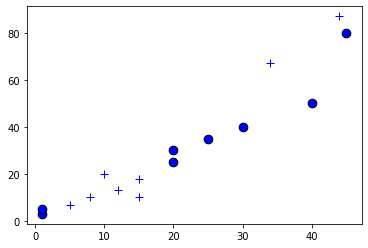

In [82]:
class_0 = np.array(X[Y==0])
class_1 = np.array(X[Y==1])

plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='+')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='blue', edgecolors='black', linewidth=1, marker='o')
plt.show()

I split my data based on the boolean value of column 2 that contain only 0s and 1s. I assigned the row where column 2 is 0 in a variable called class_0, and I assigned the row where column 2 is 1 in a variable called class_1. I put class_0 and class_1 in matplotlib.plt to graph. I labeled class_0 as '+' and class_1 as 'o'.

In [83]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)
print(predict)
print(y_test)

[0 0 1 1]
11    1
10    0
8     1
5     1
Name: 2, dtype: int64


I use DecisionTreeClassifier model from sklearn.tree class to train and predict. I fitted my training X and Y point into the model for training. Then I called the predict() method with my testing X data as parameter to predict. The method predict() will return an array of 0s and 1s value that it calculated.

In [85]:
print('precision_score = ', precision_score(y_test, predict))
print('recall_score = ', recall_score(y_test, predict))
print('f1_score = ', f1_score(y_test, predict))
print('accuracy_score = ', accuracy_score(y_test, predict))

precision_score =  1.0
recall_score =  0.6666666666666666
f1_score =  0.8
accuracy_score =  0.75


I comparred my predicted value with the real y value that is in my testing set. With the precision_score, recall_score, f1_score,and accuracy_score classes that I imported from sklearn.metrics, I use the methods to calculate their performance. This is the best result that I have with random state of '666' turned on.
<br/>
Confusion matrix:<br/><br/>
predict = [0 0 1 1]
y_test = [1 0 1 1]
<br/>
1 is positive, and 0 is negative:<br/><br/>
true_positive = 2<br/>
false_positive = 0<br/>
true_negative = 1<br/>
false_negative = 1<br/>
<br/>
Performance calculation of precision_score, recall_score, f1_score,and accuracy_score:<br/><br/>
precision_score =  1.0<br/>
recall_score =  0.6666666666666666<br/>
f1_score =  0.8<br/>
accuracy_score =  0.75<br/>

This is the best result that I got after a few runs. I think with more data or more fine tuning the randomization may help the decisiontree to perform better. 

